In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-stsb-mean-tokens')

In [2]:
# Read it in
path = "surveys_clean.csv"
df = pd.read_csv(path, na_filter=False)

# Drop unnecessary columns
df.drop(columns=['ind_id', 'subject_id', 'image_name', 'image_name_2', 'index','outfits','outfits_comment'], inplace=True)

In [3]:
df.shape

(5788, 2)

In [4]:
is_white = df['racial_group'] == 'white'
is_black = df['racial_group'] == 'black'
white = df[is_white]
black = df[is_black]

white = white['long']
black = black['long']

black = [i for i in black]
white = [i for i in white]

### Eigenvalues, spectral gap

In [5]:
embed = model.encode(black)
first = pd.DataFrame({'Response': black, 'Embedding': embed})
second = pd.DataFrame({'Response': black})

In [6]:
for i in range(0, 768):
    x = []
    for j in range(0, len(embed)):
        x.append(first['Embedding'][j][i])
    second['x'+str(i)] = x
    
second.iloc[:,1:]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x758,x759,x760,x761,x762,x763,x764,x765,x766,x767
0,-0.431953,-0.633117,-0.260997,0.415460,-0.237683,0.366318,0.100023,-0.451081,0.052305,-0.772222,...,-0.642631,0.836087,-0.149190,-1.482470,-0.134439,-0.003614,-0.635169,0.017464,-0.421150,0.702712
1,-0.214992,0.580386,0.443751,0.505816,-0.749663,-0.185046,0.921740,-0.230475,0.477832,-0.794905,...,-0.089814,0.691420,0.742551,-1.448567,-0.545186,0.429773,-0.311271,0.444563,-0.531232,0.895420
2,-0.221185,-0.399868,-0.199939,0.446165,-0.415950,0.128538,0.631262,-0.336796,-0.060227,-0.329619,...,-1.046082,0.840199,-0.032127,-2.288132,-0.212986,0.444507,-0.337037,-0.118294,-0.242437,0.492241
3,-0.295477,0.572017,-0.411632,0.144846,-0.018772,-0.431764,0.487732,-0.857616,-0.205131,-0.364119,...,-0.130924,0.962862,0.074192,-1.474225,0.079387,0.112434,-0.553907,0.097416,-0.755756,0.560328
4,-0.574096,0.517166,0.017153,0.162733,-0.337314,-0.444252,0.936756,-0.192153,0.711736,-0.574696,...,-0.783802,0.350003,-0.138772,-2.146734,-0.595041,-0.228926,0.669961,0.770853,0.078583,0.114617
5,-0.129600,-0.261325,0.835405,0.506072,0.061220,-0.294037,0.120656,-0.810101,0.435580,-1.011258,...,-0.442945,0.436407,-0.291818,-0.086346,0.090718,-0.196374,-0.844386,-0.142229,-0.793373,0.124300
6,0.705506,0.260656,1.377129,-0.589358,-0.328145,-0.258725,-0.291662,0.063210,-0.334792,-0.747061,...,-0.579069,-0.448920,0.896083,0.289612,-0.295455,0.477540,-0.395083,1.179413,0.365323,0.002767
7,-0.100324,0.106731,-0.172789,-0.011465,0.139848,-0.310977,0.551033,-0.638847,0.252459,-0.805329,...,-0.678320,-0.223613,-1.558329,-1.466871,0.271727,-0.165487,-0.295605,0.819695,-0.286685,0.278997
8,-0.162554,0.039374,0.028283,0.265046,0.288264,0.369567,0.081332,-0.402532,-0.118626,-0.996127,...,-0.384398,0.380285,0.070555,-0.870803,0.246333,-0.137658,-0.602829,0.167117,-0.568393,0.324509
9,0.535083,0.356359,1.297027,-0.067209,0.407620,-0.337240,0.114972,-0.310488,0.436291,0.049877,...,-0.105883,-0.432709,0.637354,-0.878139,-0.101677,0.152479,-0.498487,0.130223,-0.645121,0.334355


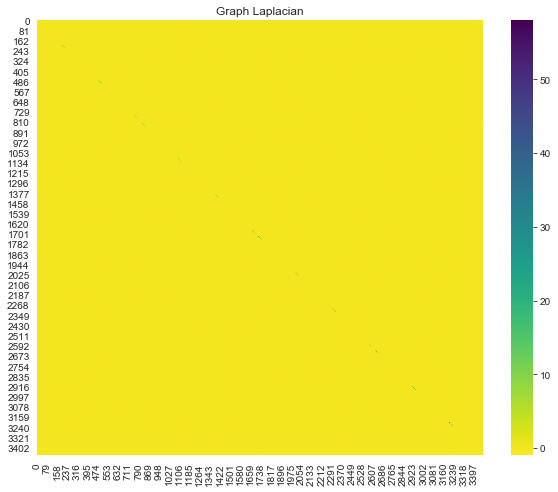

In [7]:
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=second.iloc[:,1:], nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

In [8]:
from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals))

array([0.])

In [9]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [10]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=1), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 1.6338570410527686
Max Norm: 58.855755878248644


In [11]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

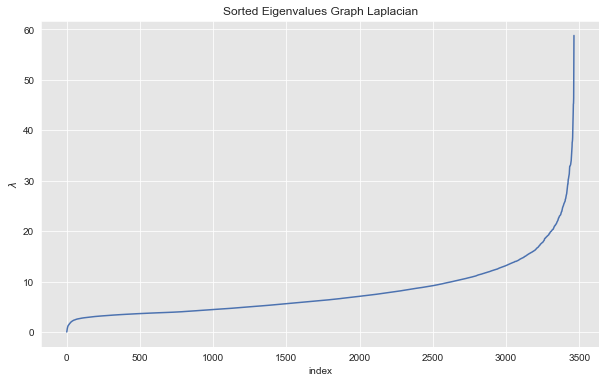

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

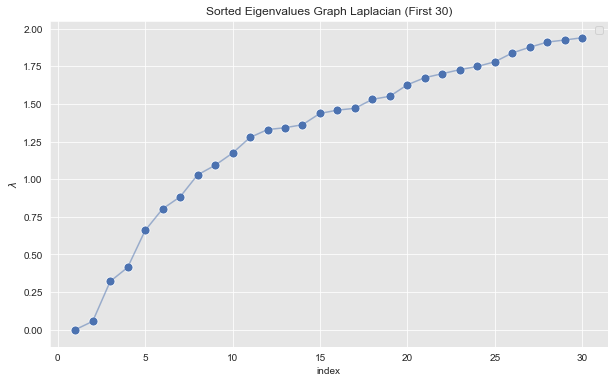

In [13]:
index_lim = 30

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
# ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

## -- 5 Clusters -- 

### TFIDF step

In [14]:
n=5

from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=n,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())

In [15]:
g = first.groupby('Cluster')
g.size().head()

Cluster
0    2643
1      19
2     611
3     165
4      26
dtype: int64

In [16]:
pd.Series(first.bag[0]).value_counts()

the             6
to              5
a               5
negro           5
for             4
and             4
have            4
of              4
that            4
was             3
each            2
they            2
be              2
its             2
many            2
been            2
fighting        2
may             2
this            2
he              2
democracy       2
america         2
as              2
are             2
but             2
from            1
civilian.       1
drawn           1
used            1
since           1
               ..
fight           1
same            1
those           1
being           1
lets            1
an              1
now.            1
kept.           1
when            1
evident         1
privilege       1
way             1
not             1
citizen         1
going           1
who             1
example         1
love            1
see             1
only            1
segregated      1
whatever        1
demand          1
it              1
advantage 

In [17]:
import re
import itertools

TF = first.bag.apply(lambda bag : pd.Series(bag).value_counts())

clusters = g.bag.aggregate(lambda listofbags: list(itertools.chain.from_iterable(listofbags)))
clusters

Cluster
0    [negro, have, been, told, many, times, they're...
1                                [l, he, all, is, the]
2    [we, negro, would, like, to, go, to, o.c.s., b...
3    [the, questionnaire, was, all, right, and, i, ...
4    [nothing, to, say, i, don't, have, any, more, ...
Name: bag, dtype: object

In [18]:
TF = clusters.apply(lambda bag : pd.Series(bag).value_counts())

In [19]:
IDF = np.log(len(TF)/TF.count())
IDF.sort_values()

all            0.000000
the            0.223144
has            0.223144
make           0.223144
know           0.223144
thing          0.223144
comment        0.223144
from           0.223144
comes          0.223144
very           0.223144
what           0.223144
about          0.223144
don't          0.223144
more           0.223144
so             0.223144
one            0.223144
make.          0.223144
no             0.223144
want           0.223144
their          0.223144
other          0.223144
.              0.223144
all.           0.223144
wish           0.223144
said           0.223144
does           0.223144
nothing        0.223144
questions.     0.223144
about.         0.223144
haven't        0.223144
                 ...   
deployment.    1.609438
11th           1.609438
preaching      1.609438
larg           1.609438
kyser          1.609438
neighbors      1.609438
"paper"        1.609438
opions         1.609438
sagarated      1.609438
lower.         1.609438
chin           1

In [20]:
TFIDF = TF * IDF

final = TFIDF.fillna(0)
np.argsort(np.array(final.loc[2]))[-4:]
np.argsort(np.array(final.loc[0]))[-4:]

(final.loc[:0].values.tolist())[0]

[2542.9439107767344,
 1397.3249183295816,
 1394.4240521624968,
 2562.3013288102093,
 2455.0279478193515,
 2152.619178549885,
 1807.8118825078411,
 732.8034225158649,
 638.8599874125825,
 1326.6141449202778,
 1292.8996537517226,
 1137.0978385030953,
 1135.0545360080314,
 1123.3055466614137,
 490.0232386860046,
 1077.8420661462403,
 439.36965253767903,
 989.469233234724,
 407.0138375971186,
 868.9143860259502,
 356.5833950001072,
 1430.329832455556,
 0.0,
 708.0043145396631,
 678.8872539850016,
 672.7573464998097,
 667.6490902621499,
 662.030008400724,
 621.1639584994447,
 268.66483578230856,
 589.4927698259532,
 561.3973605188238,
 975.8496294459752,
 933.700255779764,
 483.24104008262725,
 468.4270969934135,
 427.05022146836825,
 416.83370899304845,
 410.70380150785655,
 407.6388477652606,
 393.33573029981284,
 392.82490467604686,
 166.24194572908627,
 380.0542640818971,
 378.01096158683316,
 164.67994086988682,
 675.3062693912523,
 163.11793601068734,
 162.4485053567447,
 370.34857723

### dataframe

In [21]:
listoflists = []
for i in range(0, 5):
    listoflists.append([final.loc[i].index[j] for j in np.argsort(np.array(final.loc[i]))[-4:]])

In [22]:
[(final.loc[:8].values.tolist())[0][j] for j in list(np.argsort(np.array(final.loc[:8].values.tolist())[0])[-4:])]


[2152.619178549885, 2455.0279478193515, 2542.9439107767344, 2562.3013288102093]

In [23]:
dictionary = pd.DataFrame({'Cluster': range(0, 5), 'Individual Dictionary': listoflists})
dictionary

,Cluster,Individual Dictionary
0,0,"[in, a, the, and]"
1,1,"[is, he, the, l]"
2,2,"[in, the, a, and]"
3,3,"[good, think, i, a]"
4,4,"[have, to, dont, i]"


### --  3 Clusters --

### TFIDF step

In [24]:
n=3

from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=n,affinity='nearest_neighbors').fit(second.iloc[:, 1:])
first['Cluster'] = [i for i in spectral.labels_]
first['bag'] = first.Response.map(lambda t:t.replace(';','').lower().split())

In [25]:
g = first.groupby('Cluster')
g.size().head()

Cluster
0     207
1    3238
2      19
dtype: int64

In [26]:
pd.Series(first.bag[0]).value_counts()

the             6
to              5
a               5
negro           5
for             4
and             4
have            4
of              4
that            4
was             3
each            2
they            2
be              2
its             2
many            2
been            2
fighting        2
may             2
this            2
he              2
democracy       2
america         2
as              2
are             2
but             2
from            1
civilian.       1
drawn           1
used            1
since           1
               ..
fight           1
same            1
those           1
being           1
lets            1
an              1
now.            1
kept.           1
when            1
evident         1
privilege       1
way             1
not             1
citizen         1
going           1
who             1
example         1
love            1
see             1
only            1
segregated      1
whatever        1
demand          1
it              1
advantage 

In [27]:
import re
import itertools

TF = first.bag.apply(lambda bag : pd.Series(bag).value_counts())

clusters = g.bag.aggregate(lambda listofbags: list(itertools.chain.from_iterable(listofbags)))
clusters

Cluster
0    [i, only, hope, answer, will, help, to, find, ...
1    [negro, have, been, told, many, times, they're...
2                                [l, he, all, is, the]
Name: bag, dtype: object

In [28]:
TF = clusters.apply(lambda bag : pd.Series(bag).value_counts())

In [29]:
IDF = np.log(len(TF)/TF.count())
IDF.sort_values()

all               0.000000
the               0.000000
is                0.000000
he                0.000000
i                 0.405465
personally        0.405465
first             0.405465
life              0.405465
difference        0.405465
served            0.405465
wish              0.405465
talk              0.405465
11                0.405465
least             0.405465
believe,          0.405465
run               0.405465
here.             0.405465
not.              0.405465
now               0.405465
completed         0.405465
suggestions       0.405465
hold,             0.405465
hop               0.405465
future            0.405465
way,              0.405465
book              0.405465
course            0.405465
used              0.405465
allows            0.405465
conditions.       0.405465
                    ...   
furloughs,        1.098612
cud               1.098612
commander,        1.098612
to?               1.098612
mans,             1.098612
correctly         1.098612
l

In [30]:
TFIDF = TF * IDF

final = TFIDF.fillna(0)
np.argsort(np.array(final.loc[2]))[-4:]
np.argsort(np.array(final.loc[0]))[-4:]

(final.loc[:0].values.tolist())[0]

[96.09523062163495,
 56.35965002703485,
 50.68313851352055,
 0.0,
 0.0,
 39.73558059460011,
 37.708255054059286,
 34.05906908108581,
 32.03174354054499,
 31.626278432436823,
 29.598952891896,
 29.193487783787837,
 22.30058094594904,
 21.895115837840876,
 19.46232518919189,
 15.813139216218412,
 0.0,
 13.380348567569424,
 12.569418351353097,
 12.569418351353097,
 12.569418351353097,
 12.163953243244931,
 12.163953243244931,
 12.163953243244931,
 10.542092810812274,
 10.136627702704109,
 9.731162594595945,
 9.731162594595945,
 9.325697486487782,
 9.325697486487782,
 8.514767270271452,
 7.298371945946959,
 6.892906837838795,
 6.892906837838795,
 6.892906837838795,
 6.892906837838795,
 6.48744172973063,
 6.48744172973063,
 6.0819766216224656,
 6.0819766216224656,
 6.0819766216224656,
 6.0819766216224656,
 5.676511513514301,
 5.676511513514301,
 5.676511513514301,
 5.271046405406137,
 5.271046405406137,
 5.271046405406137,
 5.271046405406137,
 4.865581297297973,
 4.865581297297973,
 4.86558

<b> dataframe </b>

In [31]:
listoflists = []
for i in range(0, 3):
    listoflists.append([final.loc[i].index[j] for j in np.argsort(np.array(final.loc[i]))[-4:]])

In [32]:
[(final.loc[:8].values.tolist())[0][j] for j in list(np.argsort(np.array(final.loc[:8].values.tolist())[0])[-4:])]

[39.73558059460011, 50.68313851352055, 56.35965002703485, 96.09523062163495]

In [33]:
dictionary = pd.DataFrame({'Cluster': range(0, 3), 'Individual Dictionary': listoflists})
dictionary

,Cluster,Individual Dictionary
0,0,"[this, a, to, i]"
1,1,"[a, and, i, to]"
2,2,"[inward, expounded, itch, l]"
